# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [4]:
def plot_hist(X,density=False):

    mean=np.mean(X)
    sigma=np.std(X,ddof=1)
    data_len=len(X)

    fig,ax1=plt.subplots()
    ax2=ax1.twinx()
    
    # Plot the histogram
    ax1.hist(X, bins=int(data_len**.5), density=density, alpha=0.6, color='g')

    # Generate a range of x values
    x = np.linspace(min(X), max(X), 100)

    # Compute the PDF for these x values
    pdf = norm.pdf(x, mean, sigma)

    # Plot the PDF
    ax2.plot(x, pdf, 'm-', linewidth=2)

    plt.title('Histogram and PDF')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Count/Density')
    ax2.set_ylabel('Probability Density')
    ax2.set_ylim([0,np.max(pdf)*1.02])
    # Plot vertical at mean:
    plt.axvline(mean, color='r', linestyle='--', linewidth=2)
    
    plt.show()
    
    print(f"Mean: {mean}, Std.: {sigma}, Length: {data_len} ")

    return mean,sigma,data_len

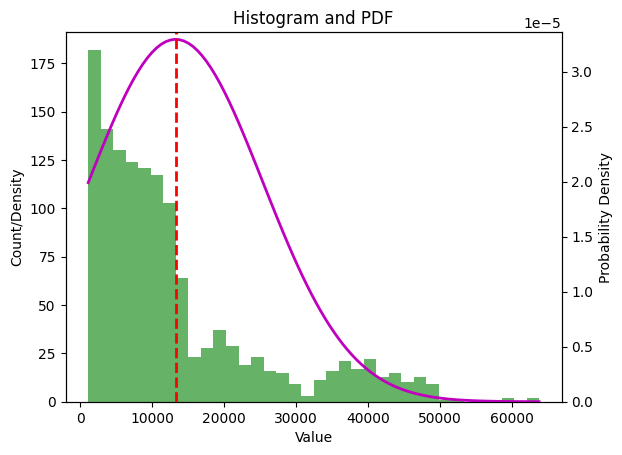

Mean: 13270.422265141257, Std.: 12110.011236694001, Length: 1338 


In [5]:
charges=medical.charges
charges_mean=plot_hist(charges)[0]

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
We can answer that question with these data because:
1. The data are random
2. The data is large
<br>These two help us make the assumption that it is representative of the original population
<br>The most appropriate frequentist test would be bootstrapping followed by a t-test for the mean

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
We are looking for a one-sided interval since the administrator is interested in the mean falling *below* a certain value

In [6]:
# Function to pull a random sample set of length (n) from input with replacement
def rsamp(x,n):
    return np.random.choice(x, n)

(array([43., 34.,  8.,  2.,  2.,  3.,  2.,  3.,  2.,  1.]),
 array([ 1633.0444  ,  7471.879857, 13310.715314, 19149.550771,
        24988.386228, 30827.221685, 36666.057142, 42504.892599,
        48343.728056, 54182.563513, 60021.39897 ]),
 <BarContainer object of 10 artists>)

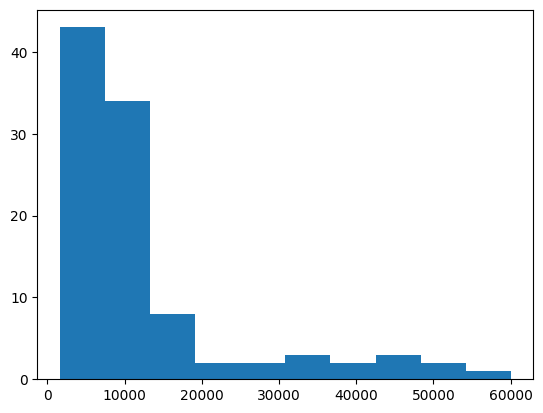

In [7]:
plt.hist(rsamp(charges,100))

In [8]:
# Calculate bootstrapped sample means
charges_samp_mean=np.array([])
n_bootstrap=1000
for i in range(n_bootstrap):
    charges_samp_mean=np.append(charges_samp_mean,np.mean(rsamp(charges,100)))

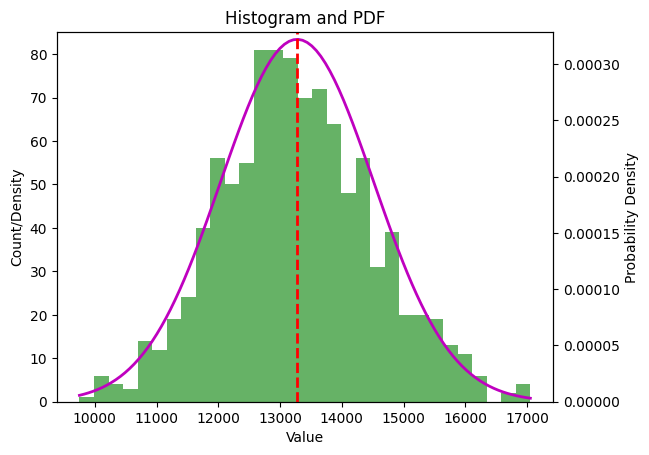

Mean: 13276.098889448953, Std.: 1239.6133871944774, Length: 1000 


In [9]:
# Plot the distribution
mean_bs,std_bs,len_bs=plot_hist(charges_samp_mean)

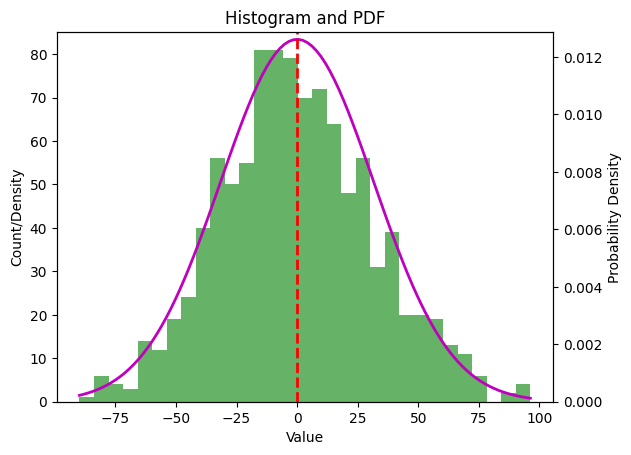

Mean: -7.128164725145325e-14, Std.: 31.622776601683793, Length: 1000 


(-7.128164725145325e-14, 31.622776601683793, 1000)

In [10]:
# Bootstrapped t-statistic
t_bs=(charges_samp_mean-mean_bs)/(std_bs/len_bs**.5)
plot_hist(t_bs)

As expected we get a normal distribution (from the CLT) with a mean close to the original sample mean. The standard deviation of the means is 1278. We can use this in combination with a T-test to get the CI

In [11]:
# One sided t-statistic to get CI

# Calculate the sample mean and standard deviation
sample_mean = 13270 # Here we enter the original sample's mean value that is more representative of the population
sample_std = std_bs
n = len_bs

# Calculate the standard error
standard_error = sample_std / np.sqrt(n)

# Find the critical t-value for 95% confidence interval
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Calculate the 95% confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"t-Critical Value: {t_critical:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")


Sample Mean: 13270.00
Standard Error: 39.2000
t-Critical Value: 1.9623
Margin of Error: 76.9238
95% Confidence Interval: (13193.076180940472, 13346.923819059528)


In [12]:
# Use hypothesis testing to calculate the probability of 12000 or less
# Null Hypothesis: The mean is greater than or equal to 12000
# Alt. Hypothesis: The mean is less than 12000
value=12000
n=len_bs
########## t-statistic
t_statistic=(value-charges_mean)/(std_bs/n**.5)
p_value = t.cdf(t_statistic, df=n)
p_value

2.1591966699063516e-158

*Since the 95% CI does not include 12000, we can be certain that the mean is >12000. This is confirmed by the extremely small p-value for the one-sided t-test*

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
<br>*We assume that the variances of the poplation of the two groups are equal and that the populations are independent*
<br>Null Hypothesis: There is no difference in the charges for insured and uninsured
<br>Alternative Hypothesis: There is a difference in the charges for insured and uninsured

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [13]:
charges_ins=medical[medical.insuranceclaim==1].charges
charges_unins=medical[medical.insuranceclaim==0].charges
n_charges_ins=charges_ins.shape[0]
n_charges_unins=charges_unins.shape[0]
mean_charges_ins=np.mean(charges_ins)
std_charges_ins=np.std(charges_ins,ddof=1)
mean_charges_unins,std_charges_unins=np.mean(charges_unins),np.std(charges_unins,ddof=1)

In [14]:

# Degrees of freedom
df = n_charges_ins + n_charges_unins - 2
# Pooled standard deviation
std_charges = np.sqrt(
    ((n_charges_ins - 1) * std_charges_ins**2 + (n_charges_unins - 1) * std_charges_unins**2) /df
)
t_statistic = (mean_charges_ins - mean_charges_unins) / (std_charges * np.sqrt(1/n_charges_ins + 1/n_charges_unins))

# Calculate the p-value
p_value = 2 * t.cdf(-abs(t_statistic), df)

print(f"T-statistic: {t_statistic}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value}")


std_charges,t_statistic,p_value


T-statistic: 11.89329903087671
Degrees of freedom: 1336
P-value: 4.461230231620972e-31


(11520.034268775262, 11.89329903087671, 4.461230231620972e-31)

In [15]:
# Perform t-test assuming equal variances
from scipy import stats
t_statistic, p_value = stats.ttest_ind(charges_ins, charges_unins, equal_var=True)
print(f"T-test assuming equal variances:\nT-statistic: {t_statistic}, P-value: {p_value}")


T-test assuming equal variances:
T-statistic: 11.893299030876712, P-value: 4.461230231620717e-31


*We get the same t-value using the formula as with manual calculation*

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ <br> There is no library to perform a z-test from a sample like the t-test in scipy.stats. So we have to calculate the z-statistic manually. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test